In [2]:
%load_ext autoreload
%autoreload 2

import torch
from einops import rearrange
from text3d2video.artifacts.multiview_features_artifact import MVFeaturesArtifact
from text3d2video.feature_visualization import RgbPcaUtil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
mv_features_tag = "deadpool-mv-features:latest"
mv_features = MVFeaturesArtifact.from_wandb_artifact_tag("deadpool-mv-features:v9")

In [4]:
layers = mv_features.get_key_values("layer")
views = sorted([int(v) for v in mv_features.get_key_values("view")])
timesteps = sorted([int(t) for t in mv_features.get_key_values("timestep")])

In [7]:
from math import sqrt
from typing import List
from text3d2video.ipython_utils import display_ims


def display_features(features: List[torch.Tensor], separate_pca=False, scale=3):
    if separate_pca:
        feature_maps_rgb = []

        for feature in features:
            pca = RgbPcaUtil.init_and_fit(feature)
            feature_map_size = int(sqrt(feature.shape[0]))
            feature_map = rearrange(feature, "(h w) c -> c h w", h=feature_map_size)
            feature_map_rgb = pca.feature_map_to_rgb_pil(feature_map)
            feature_maps_rgb.append(feature_map_rgb)

        display_ims(feature_maps_rgb, scale=scale)
        return

    # get all features, and fit PCA
    all_features = torch.cat(features)
    pca = RgbPcaUtil.init_and_fit(all_features)

    # PCA each feature
    feature_maps_rgb = []
    for feature in features:
        feature_map_size = int(sqrt(feature.shape[0]))
        feature_map = rearrange(feature, "(h w) c -> c h w", h=feature_map_size)
        feature_map_rgb = pca.feature_map_to_rgb_pil(feature_map)
        feature_maps_rgb.append(feature_map_rgb)

    display_ims(feature_maps_rgb, scale=scale)

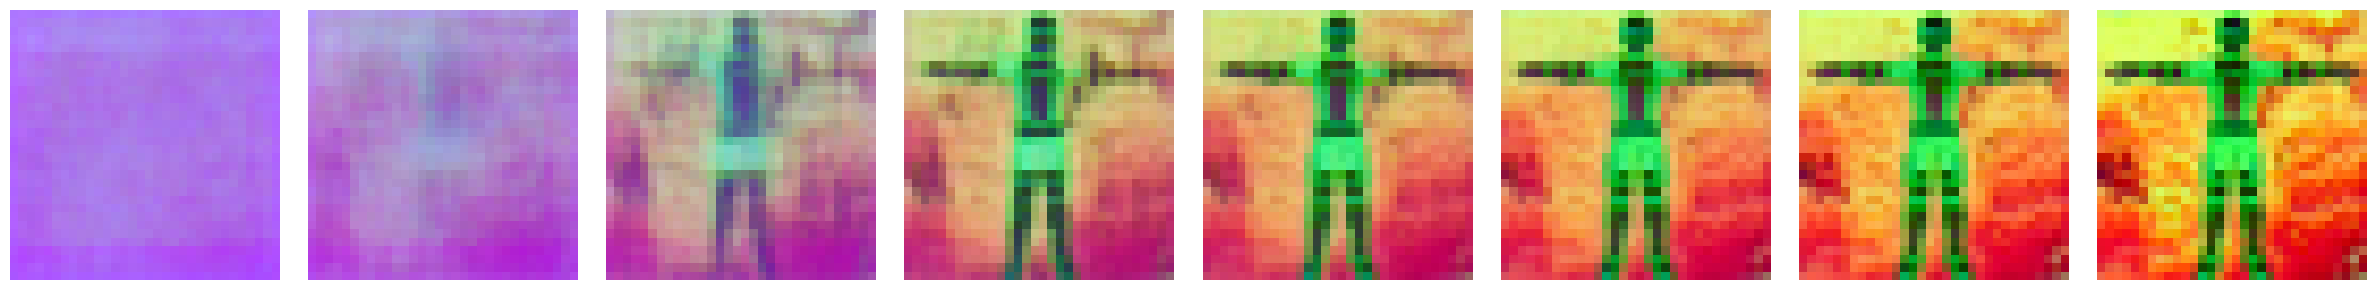

In [8]:
from text3d2video.util import ordered_sample

ids = [
    {"view": views[0], "layer": layers[0], "timestep": t}
    for t in ordered_sample(timesteps, 8)
]
features = [mv_features.get_feature_by_id(i) for i in ids]
display_features(features)

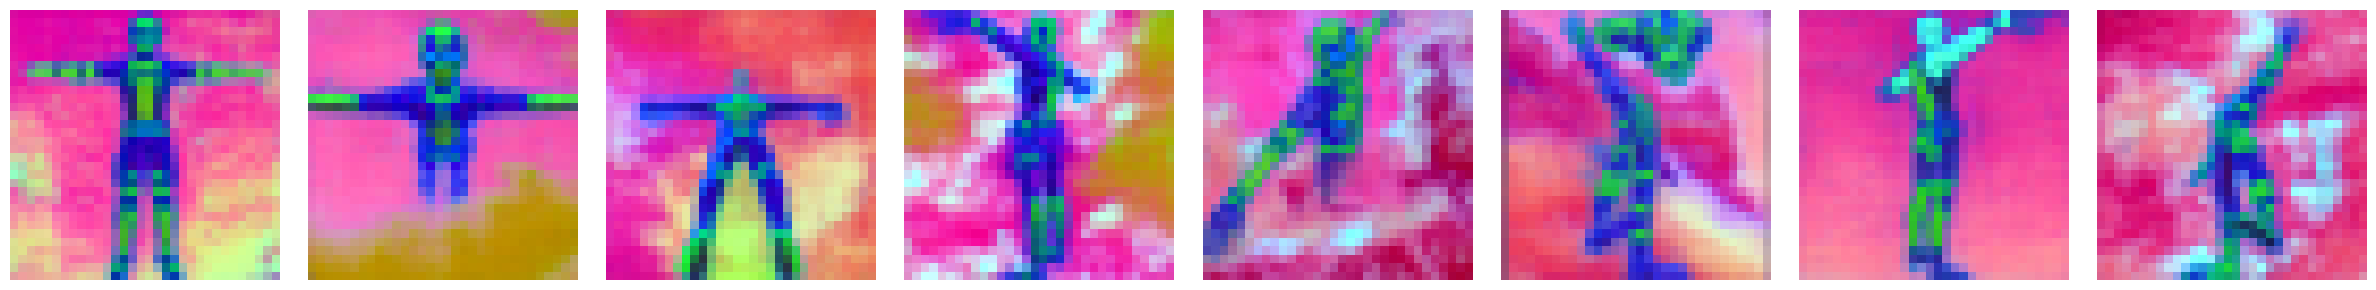

In [9]:
ids = [
    {"view": v, "layer": layers[0], "timestep": timesteps[20]}
    for v in ordered_sample(views, 8)
]
features = [mv_features.get_feature_by_id(i) for i in ids]
display_features(features)

In [1]:
ids = [
    {"view": views[0], "layer": layer, "timestep": timesteps[20]} for layer in layers
]
features = [mv_features.get_feature_by_id(i) for i in ids]

display_features(features, separate_pca=True)

NameError: name 'layers' is not defined